# Web Scrapping

In [ ]:
!pip install google-play-scraper
from google_play_scraper import app
from google_play_scraper import Sort, reviews
import pandas as pd
import numpy as np
result, continuation_token = reviews(
 'com.instagram.barcelona',
 lang='en',
 country='us',
 sort=Sort.NEWEST,
 count=20000,
 filter_score_with=None
)
dataset = pd.DataFrame(np.array(result),columns=['review'])
dataset = dataset.join(pd.DataFrame(dataset.pop('review').tolist()))
dataset = dataset.sort_values('at', ascending=True)
filtered_dataset = dataset[(dataset['at'] >= '2023-07-07') & (dataset['at'] <= '2023-10-30')]
data_ulasan = filtered_dataset[['sentences']]
data_ulasan.to_csv('data_ulasan_mentah.csv', index=False)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


# Membaca Data Berdasarkan Sentimen

In [134]:
import pandas as pd
import numpy as np
import nltk
import string
import re

data_ulasan = pd.read_csv('data_ulasan_aspek.csv', sep=';')
data_ulasan

,Sentences,Aspects
0,Good application âœ¨,Satisfaction
1,Good launch app,Satisfaction
2,Great app,Satisfaction
3,Better than Twitter freedom of speech ðŸ’¬ðŸ˜€,Satisfaction
4,Best app atleast for now it's yoo good ðŸ’¯,Satisfaction
...,...,...
895,The app works smoothly and is well-designed.,Error
896,App-breaking screen bug where it looks like mu...,Error
897,Extremely buggy. I can't even scroll without e...,Error
898,Liked it until today when it started crashing....,Error


# Cleaning Data

In [135]:
# Fungsi untuk membersihkan ulasan
def clean_review(review):
    # Menghilangkan tanda baca, nomor, dan emotikon
    cleaned_review = re.sub(r'[^\w\s]', '', review)
    cleaned_review = re.sub(r'\d+', '', cleaned_review)
    cleaned_review = cleaned_review.encode('ascii', 'ignore').decode('ascii')
    return cleaned_review

data_ulasan['Data Cleansing'] = data_ulasan['Sentences'].apply(lambda x: clean_review(x))
data_ulasan.head()

,Sentences,Aspects,Data Cleansing
0,Good application âœ¨,Satisfaction,Good application
1,Good launch app,Satisfaction,Good launch app
2,Great app,Satisfaction,Great app
3,Better than Twitter freedom of speech ðŸ’¬ðŸ˜€,Satisfaction,Better than Twitter freedom of speech
4,Best app atleast for now it's yoo good ðŸ’¯,Satisfaction,Best app atleast for now its yoo good


# Case Folding

In [136]:
# Melakukan case folding dengan mengubah seluruh teks ke huruf kecil
def case_folding(reviews_lower):
  reviews_lower = reviews_lower.lower()
  return reviews_lower

data_ulasan['Case Folding'] = data_ulasan['Data Cleansing'].apply(lambda x: case_folding(x))
data_ulasan.head()

,Sentences,Aspects,Data Cleansing,Case Folding
0,Good application âœ¨,Satisfaction,Good application,good application
1,Good launch app,Satisfaction,Good launch app,good launch app
2,Great app,Satisfaction,Great app,great app
3,Better than Twitter freedom of speech ðŸ’¬ðŸ˜€,Satisfaction,Better than Twitter freedom of speech,better than twitter freedom of speech
4,Best app atleast for now it's yoo good ðŸ’¯,Satisfaction,Best app atleast for now its yoo good,best app atleast for now its yoo good


# Membaca dan Membuat Slang Dict

In [137]:
slang_dict = pd.read_csv('slang_dict.csv', sep=';')
slang_dict

,Informal Vocab,Formal Vocab
0,im,I am
1,ive,I have
2,dont,do not
3,doesnt,does not
4,cant,cannot
...,...,...
103,pov,point of view
104,imho,in my humble opinion
105,fomo,fear of missing out
106,ftw,for the win


In [138]:
slang_vocab = dict(zip(slang_dict['Informal Vocab'], slang_dict['Formal Vocab']))
slang_vocab

{'im': 'I am',
 'ive': 'I have',
 'dont': 'do not',
 'doesnt': 'does not',
 'cant': 'cannot',
 'youre': 'you are',
 'its': 'it is',
 'thats': 'that is',
 'didnt': 'did not',
 'wont': 'will not',
 'wasnt': 'was not',
 'theyre': 'they are',
 'theres': 'there is',
 'gonna': 'going to',
 'gotta': 'got to',
 'wanna': 'want to',
 'shouldve': 'should have',
 'couldve': 'could have',
 'wouldve': 'would have',
 'mightve': 'might have',
 'mustve': 'must have',
 'aint': 'am not',
 'dunno': "don't know",
 'kinda': 'kind of',
 'lemme': 'let me',
 'gimme': 'give me',
 'yall': 'you all',
 'shoulda': 'should have',
 'coulda': 'could have',
 'woulda': 'would have',
 'musta': 'must have',
 'oughta': 'ought to',
 'sorta': 'sort of',
 'app': 'application',
 'pics': 'pictures',
 'doc': 'document',
 'info': 'information',
 'demo': 'demonstration',
 'pic': 'picture',
 'vid': 'video',
 'intro': 'introduction',
 'fav': 'favorite',
 'stats': 'statistics',
 'specs': 'specifications',
 'promo': 'promotion',
 'mem

# Slang Normalization

In [139]:
# Fungsi untuk normalisasi slang
def normalize_slang(text):
    words = text.split()
    normalized_words = [slang_vocab.get(word, word) for word in words]
    normalized_text = " ".join(normalized_words)
    return normalized_text

data_ulasan['Slang Normalisasi'] = data_ulasan['Case Folding'].apply(lambda x: normalize_slang(x))
data_ulasan.head()

,Sentences,Aspects,Data Cleansing,Case Folding,Slang Normalisasi
0,Good application âœ¨,Satisfaction,Good application,good application,good application
1,Good launch app,Satisfaction,Good launch app,good launch app,good launch application
2,Great app,Satisfaction,Great app,great app,great application
3,Better than Twitter freedom of speech ðŸ’¬ðŸ˜€,Satisfaction,Better than Twitter freedom of speech,better than twitter freedom of speech,better than twitter freedom of speech
4,Best app atleast for now it's yoo good ðŸ’¯,Satisfaction,Best app atleast for now its yoo good,best app atleast for now its yoo good,best application atleast for now it is yoo good


# Stemming with Lemmatization

In [140]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatize_text(text):
    # Inisialisasi lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Memecah teks menjadi kata-kata
    words = text.split()

    # Melakukan lemmatization pada setiap kata
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Menggabungkan kata-kata yang sudah dilemmatize
    lemmatized_text = " ".join(lemmatized_words)

    return lemmatized_text

# Contoh penggunaan fungsi pada kolom DataFrame
data_ulasan['Stemming'] = data_ulasan['Slang Normalisasi'].apply(lambda x: lemmatize_text(x))
data_ulasan.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Sentences,Aspects,Data Cleansing,Case Folding,Slang Normalisasi,Stemming
0,Good application âœ¨,Satisfaction,Good application,good application,good application,good application
1,Good launch app,Satisfaction,Good launch app,good launch app,good launch application,good launch application
2,Great app,Satisfaction,Great app,great app,great application,great application
3,Better than Twitter freedom of speech ðŸ’¬ðŸ˜€,Satisfaction,Better than Twitter freedom of speech,better than twitter freedom of speech,better than twitter freedom of speech,better than twitter freedom of speech
4,Best app atleast for now it's yoo good ðŸ’¯,Satisfaction,Best app atleast for now its yoo good,best app atleast for now its yoo good,best application atleast for now it is yoo good,best application atleast for now it is yoo good


# Tokenizing

In [141]:
import nltk
nltk.download('punkt')  # Download data yang diperlukan oleh NLTK
from nltk.tokenize import word_tokenize

def tokenizing(words):
  words = word_tokenize(words)
  return words

data_ulasan['Tokenizing'] = data_ulasan['Stemming'].apply(lambda x: tokenizing(x))

data_ulasan.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Sentences,Aspects,Data Cleansing,Case Folding,Slang Normalisasi,Stemming,Tokenizing
0,Good application âœ¨,Satisfaction,Good application,good application,good application,good application,"[good, application]"
1,Good launch app,Satisfaction,Good launch app,good launch app,good launch application,good launch application,"[good, launch, application]"
2,Great app,Satisfaction,Great app,great app,great application,great application,"[great, application]"
3,Better than Twitter freedom of speech ðŸ’¬ðŸ˜€,Satisfaction,Better than Twitter freedom of speech,better than twitter freedom of speech,better than twitter freedom of speech,better than twitter freedom of speech,"[better, than, twitter, freedom, of, speech]"
4,Best app atleast for now it's yoo good ðŸ’¯,Satisfaction,Best app atleast for now its yoo good,best app atleast for now its yoo good,best application atleast for now it is yoo good,best application atleast for now it is yoo good,"[best, application, atleast, for, now, it, is,..."


# Filtering

In [142]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Mengambil daftar kata-kata umum dari kamus NLTK
stop_words = set(stopwords.words('english'))

def remove_stopwords(words):

    # Menghilangkan kata-kata umum
    filtered_words = [word for word in words if word.lower() not in stop_words]

    return filtered_words

# Contoh penggunaan fungsi pada kolom DataFrame
data_ulasan['Filtering'] = data_ulasan['Tokenizing'].apply(lambda x: remove_stopwords(x))
data_ulasan.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentences,Aspects,Data Cleansing,Case Folding,Slang Normalisasi,Stemming,Tokenizing,Filtering
0,Good application âœ¨,Satisfaction,Good application,good application,good application,good application,"[good, application]","[good, application]"
1,Good launch app,Satisfaction,Good launch app,good launch app,good launch application,good launch application,"[good, launch, application]","[good, launch, application]"
2,Great app,Satisfaction,Great app,great app,great application,great application,"[great, application]","[great, application]"
3,Better than Twitter freedom of speech ðŸ’¬ðŸ˜€,Satisfaction,Better than Twitter freedom of speech,better than twitter freedom of speech,better than twitter freedom of speech,better than twitter freedom of speech,"[better, than, twitter, freedom, of, speech]","[better, twitter, freedom, speech]"
4,Best app atleast for now it's yoo good ðŸ’¯,Satisfaction,Best app atleast for now its yoo good,best app atleast for now its yoo good,best application atleast for now it is yoo good,best application atleast for now it is yoo good,"[best, application, atleast, for, now, it, is,...","[best, application, atleast, yoo, good]"


# TF-IDF

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Fungsi untuk konversi nilai list ke dalam teks string
def convert_list_to_string(column):
    return column.apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Kolom 'Filtering' dan 'Aspects' dikonversi menjadi string
data_ulasan['Filtering'] = convert_list_to_string(data_ulasan['Filtering'])
data_ulasan['Aspects'] = convert_list_to_string(data_ulasan['Aspects'])

# Memastikan bahwa tipe data pada kolom 'Filtering' adalah string
types_in_column_filtering = data_ulasan['Filtering'].apply(type)
if all(t == str for t in types_in_column_filtering):
    print("Semua elemen pada kolom 'Filtering' adalah string.")
else:
    print("Data pada kolom 'Filtering' masih berisi elemen yang bukan string.")

# Memastikan bahwa tipe data pada kolom 'Aspects' adalah string
types_in_column_aspects = data_ulasan['Aspects'].apply(type)
if all(t == str for t in types_in_column_aspects):
    print("Semua elemen pada kolom 'Aspects' adalah string.")
else:
    print("Data pada kolom 'Aspects' masih berisi elemen yang bukan string.")

# Split data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(data_ulasan['Filtering'], data_ulasan['Aspects'], test_size=0.1, random_state=42)


# Inisialisasi dan fit transform TF-IDF pada set pelatihan
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform set pengujian menggunakan TF-IDF yang sama
X_test_tfidf = vectorizer.transform(X_test)

Semua elemen pada kolom 'Filtering' adalah string.
Semua elemen pada kolom 'Aspects' adalah string.


In [145]:
# Export TF-IDF
# Ekstraksi nama fitur
feature_names = vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF ke dalam DataFrame
df_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)
df_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=feature_names)

# Oversampling ADASYN

In [146]:
from imblearn.over_sampling import ADASYN
# Oversampling menggunakan ADASYN
adasyn = ADASYN(sampling_strategy='minority')
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_tfidf, y_train)

# Pengujian Parameter

## Kernel

In [147]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
kernel_values = ['linear','poly','rbf','sigmoid']

for K in kernel_values:
    svc = svm.SVC(kernel=K)
    scores = cross_val_score(svc, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
    average_accuracy = scores.mean()
    print("Kernel =", K, "| Akurasi =", scores, "| Rata-rata Akurasi =", average_accuracy)

Kernel = linear | Akurasi = [0.91764706 0.92941176 0.94117647 0.94117647 0.92941176 0.95294118
 0.96470588 0.90588235 0.89285714 0.91666667] | Rata-rata Akurasi = 0.9291876750700279
Kernel = poly | Akurasi = [0.8        0.84705882 0.82352941 0.71764706 0.84705882 0.85882353
 0.81176471 0.82352941 0.79761905 0.78571429] | Rata-rata Akurasi = 0.8112745098039216
Kernel = rbf | Akurasi = [0.90588235 0.95294118 0.96470588 0.89411765 0.92941176 0.94117647
 0.91764706 0.91764706 0.88095238 0.9047619 ] | Rata-rata Akurasi = 0.9209243697478993
Kernel = sigmoid | Akurasi = [0.91764706 0.92941176 0.91764706 0.91764706 0.94117647 0.96470588
 0.94117647 0.91764706 0.88095238 0.89285714] | Rata-rata Akurasi = 0.9220868347338935


## Complexity

In [148]:
C_values = [0.001, 0.01, 0.1, 1, 5, 10]

for C in C_values:
    svc = svm.SVC(kernel='linear', C=C)
    scores = cross_val_score(svc, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
    average_accuracy = scores.mean()
    print("C =", C, "| Akurasi =", scores, "| Rata-rata Akurasi =", average_accuracy)

C = 0.001 | Akurasi = [0.51764706 0.51764706 0.51764706 0.51764706 0.51764706 0.51764706
 0.51764706 0.51764706 0.51190476 0.51190476] | Rata-rata Akurasi = 0.5164985994397759
C = 0.01 | Akurasi = [0.51764706 0.51764706 0.51764706 0.51764706 0.51764706 0.51764706
 0.51764706 0.51764706 0.51190476 0.51190476] | Rata-rata Akurasi = 0.5164985994397759
C = 0.1 | Akurasi = [0.88235294 0.90588235 0.84705882 0.78823529 0.84705882 0.83529412
 0.85882353 0.83529412 0.80952381 0.8452381 ] | Rata-rata Akurasi = 0.8454761904761904
C = 1 | Akurasi = [0.91764706 0.92941176 0.94117647 0.94117647 0.92941176 0.95294118
 0.96470588 0.90588235 0.89285714 0.91666667] | Rata-rata Akurasi = 0.9291876750700279
C = 5 | Akurasi = [0.90588235 0.90588235 0.91764706 0.95294118 0.90588235 0.94117647
 0.96470588 0.94117647 0.86904762 0.92857143] | Rata-rata Akurasi = 0.9232913165266107
C = 10 | Akurasi = [0.90588235 0.90588235 0.92941176 0.94117647 0.91764706 0.92941176
 0.97647059 0.92941176 0.86904762 0.94047619]

## Maximum Iteration

In [149]:
Max_Iter_values = [50, 100, 150, 200, 250]

for M in Max_Iter_values:
    svc = svm.SVC(kernel='linear', C=1, max_iter=M)
    scores = cross_val_score(svc, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
    average_accuracy = scores.mean()
    print("Max_Iter =", M, "| Akurasi =", scores, "| Rata-rata Akurasi =", average_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-proce

Max_Iter = 50 | Akurasi = [0.8        0.88235294 0.84705882 0.75294118 0.85882353 0.85882353
 0.85882353 0.88235294 0.86904762 0.8452381 ] | Rata-rata Akurasi = 0.845546218487395


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

Max_Iter = 100 | Akurasi = [0.85882353 0.91764706 0.91764706 0.94117647 0.94117647 0.91764706
 0.92941176 0.94117647 0.9047619  0.91666667] | Rata-rata Akurasi = 0.9186134453781513


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-

Max_Iter = 150 | Akurasi = [0.90588235 0.94117647 0.91764706 0.95294118 0.92941176 0.96470588
 0.94117647 0.95294118 0.91666667 0.91666667] | Rata-rata Akurasi = 0.9339215686274509


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

Max_Iter = 200 | Akurasi = [0.91764706 0.92941176 0.94117647 0.94117647 0.92941176 0.96470588
 0.94117647 0.94117647 0.9047619  0.9047619 ] | Rata-rata Akurasi = 0.9315406162464986


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-

Max_Iter = 250 | Akurasi = [0.91764706 0.92941176 0.94117647 0.94117647 0.92941176 0.96470588
 0.96470588 0.94117647 0.9047619  0.9047619 ] | Rata-rata Akurasi = 0.9338935574229692


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## Gamma (Non-Linear)

In [150]:
gamma_values = [0.01, 0.1, 1, 3, 5]

for G in gamma_values:
    svc = svm.SVC(kernel='linear', C=1, gamma=G)
    scores = cross_val_score(svc, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
    average_accuracy = scores.mean()
    print("Gamma =", G, "| Akurasi =", scores, "| Rata-rata Akurasi =", average_accuracy)

Gamma = 0.01 | Akurasi = [0.91764706 0.92941176 0.94117647 0.94117647 0.92941176 0.95294118
 0.96470588 0.90588235 0.89285714 0.91666667] | Rata-rata Akurasi = 0.9291876750700279
Gamma = 0.1 | Akurasi = [0.91764706 0.92941176 0.94117647 0.94117647 0.92941176 0.95294118
 0.96470588 0.90588235 0.89285714 0.91666667] | Rata-rata Akurasi = 0.9291876750700279
Gamma = 1 | Akurasi = [0.91764706 0.92941176 0.94117647 0.94117647 0.92941176 0.95294118
 0.96470588 0.90588235 0.89285714 0.91666667] | Rata-rata Akurasi = 0.9291876750700279
Gamma = 3 | Akurasi = [0.91764706 0.92941176 0.94117647 0.94117647 0.92941176 0.95294118
 0.96470588 0.90588235 0.89285714 0.91666667] | Rata-rata Akurasi = 0.9291876750700279
Gamma = 5 | Akurasi = [0.91764706 0.92941176 0.94117647 0.94117647 0.92941176 0.95294118
 0.96470588 0.90588235 0.89285714 0.91666667] | Rata-rata Akurasi = 0.9291876750700279


# Implementasi SVM

In [151]:
from sklearn import svm
from sklearn.metrics import classification_report

model = svm.SVC(kernel='linear', C=1, max_iter=150)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_tfidf)
report = classification_report(y_test, y_pred, target_names=['satisfaction', 'error'])
print(report)

              precision    recall  f1-score   support

satisfaction       0.89      0.86      0.87        28
       error       0.94      0.95      0.94        62

    accuracy                           0.92        90
   macro avg       0.91      0.90      0.91        90
weighted avg       0.92      0.92      0.92        90



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# Pengujian 10-Fold CV SVM

In [152]:
score1=cross_val_score(model,X_train_resampled,y_train_resampled,
cv=10,scoring='accuracy')

score2=cross_val_score(model,X_train_resampled,y_train_resampled,
cv=10,scoring='precision_macro')

score3=cross_val_score(model,X_train_resampled,y_train_resampled,
cv=10,scoring='recall_macro')

score4=cross_val_score(model,X_train_resampled,y_train_resampled,
cv=10,scoring='f1_macro')

print("Accuracy =", score1, "| Rata-rata Akurasi =", score1.mean())
print("Precision =", score2, "| Rata-rata Precision =", score2.mean())
print("Recall =", score3, "| Rata-rata Recall =", score3.mean())
print("F1-Score =", score3, "| Rata-rata F1-Score =", score4.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-

Accuracy = [0.90588235 0.94117647 0.91764706 0.95294118 0.92941176 0.96470588
 0.94117647 0.95294118 0.91666667 0.91666667] | Rata-rata Akurasi = 0.9339215686274509
Precision = [0.90719064 0.94166667 0.91805556 0.95288248 0.93617021 0.96456257
 0.94166667 0.95555556 0.91818182 0.91666667] | Rata-rata Precision = 0.9352598830094412
Recall = [0.90493348 0.94068736 0.9171286  0.95288248 0.93181818 0.96507761
 0.94068736 0.95454545 0.91747022 0.91690301] | Rata-rata Recall = 0.934213375960398
F1-Score = [0.90493348 0.94068736 0.9171286  0.95288248 0.93181818 0.96507761
 0.94068736 0.95454545 0.91747022 0.91690301] | Rata-rata F1-Score = 0.9338248577594767


# Confussion Matrix

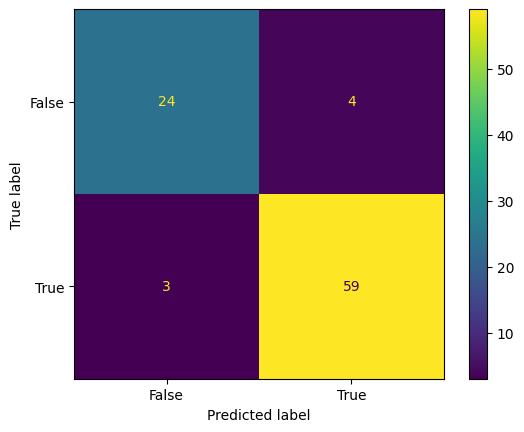

In [153]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_ = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_, display_labels = [False, True])
cm_display.plot()
plt.show()

# Packaging Model and TF-IDF

In [154]:
import pickle
pickle.dump(model, open('aspect_classifier.sav', 'wb'))
pickle.dump(vectorizer, open('vectorizer.sav', 'wb'))

# Predict Ulasan

In [155]:
import pickle
import pandas as pd

def load_model(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

def text_preprocessing(ulasan):
    if isinstance(ulasan, list):
        ulasan = ' '.join(map(str, ulasan))

    ulasan = clean_review(ulasan)
    ulasan = case_folding(ulasan)
    ulasan = normalize_slang(ulasan)
    ulasan = lemmatize_text(ulasan)
    ulasan = tokenizing(ulasan)
    ulasan = remove_stopwords(ulasan)
    return ulasan

def text_tfidf(ulasan, vectorizer):
    if isinstance(ulasan, list):
        ulasan = ' '.join(map(str, ulasan))


    # Menggunakan vectorizer yang sudah diload
    train_vectors = vectorizer.transform([ulasan])

    # Ekstraksi nama fitur
    feature_names = vectorizer.get_feature_names_out()

    # Konversi matriks TF-IDF ke dalam DataFrame
    dense = train_vectors.todense()
    denselist = dense.tolist()
    dftfidf = pd.DataFrame(denselist, columns=feature_names)
    return dftfidf

# Contoh penggunaan fungsi
model_path = 'aspect_classifier.sav'
vectorizer_path = 'vectorizer.sav'

model = load_model(model_path)
vectorizer = load_model(vectorizer_path)

ulasan_input = ["I can't signup new account, need to install Instagram..."]
hasil_prediksi = text_preprocessing(ulasan_input)

# Ekstraksi fitur dengan menggunakan model TF-IDF yang telah dilatih
ulasan_tfidf = text_tfidf(hasil_prediksi, vectorizer)

# Melakukan prediksi menggunakan model klasifikasi yang telah dilatih
hasil_prediksi = model.predict(ulasan_tfidf)

# Output hasil prediksi
print("Hasil Prediksi:", hasil_prediksi)

Hasil Prediksi: ['Error']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
